In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer         
from sklearn.feature_extraction.text import TfidfVectorizer     
import gensim
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
unable to import 'smart_open.gcs', disabling that module


In [2]:
import time
import pickle

In [216]:
data = pd.read_csv("data/Reviews.csv")

In [217]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [218]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [219]:
data.shape

(568454, 10)

In [220]:
data = data[data['Score'] != 3]

In [221]:
data.Score.unique()

array([5, 1, 4, 2])

In [222]:
data['Score'].value_counts()

5    363122
4     80655
1     52268
2     29769
Name: Score, dtype: int64

In [223]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

score = data['Score']
temp = score.map(partition)
data['Score'] = temp

In [224]:
data = data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

In [225]:
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]

In [226]:
data = data.iloc[:100000,:]

In [227]:
data_X = data['Text']
data_Y = data['Score']

In [228]:
data_Y.values[1]

'negative'

In [229]:
print(set(stopwords.words('english')))

{'being', 'through', 'now', 'where', 'be', 'very', "weren't", "don't", 'hadn', 'were', 'didn', 'for', 'yours', 'couldn', 'of', 'these', 'ourselves', 'at', 'mightn', 'myself', 'ours', 'him', 'by', "it's", 'haven', 'doesn', "wasn't", 'in', 'll', 'further', 'won', 'all', 'them', 'whom', 'had', 'and', 'my', 'when', 'those', 'into', 'nor', 'an', 'only', "should've", "shan't", 'am', 'own', 'between', 'their', 'i', 'same', 'so', 'm', 'y', 'does', 'itself', "shouldn't", "aren't", 'from', 'd', 'most', 'yourselves', 'has', 'did', 'such', 'weren', 'it', 'theirs', 'up', 'some', "mightn't", 'out', 'more', "isn't", "you're", 'who', 'wasn', 'after', 'we', 'against', 't', 'themselves', 'how', 'than', 're', 'her', 'can', 'any', "needn't", 'our', 'not', "mustn't", 'over', 'should', "that'll", 'just', 'isn', 'is', 'during', "doesn't", 'until', 'while', 'as', 'what', "she's", 'ma', 'about', "couldn't", 'under', "you'll", 'the', 'each', 'don', 'his', 'are', 've', 'shan', "you've", 'this', 's', 'was', "woul

In [3]:
import re
snow = nltk.stem.SnowballStemmer('english')
stop = set(stopwords.words('english'))

def cleanhtml(sentence):
    sentence = sentence.lower()                                       # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)                          # Cleaning Html tags
    
    return sentence

def cleanpunc(sentence):
    sentence = re.sub('[^A-Za-z0-9]+', '', sentence)                # Cleaning punctuations
    
    return sentence

In [231]:
temp = []
str1 = ''
positive_words = []
negative_words = []
i = 0
for sentence in data_X:
    words = []
    sentence = cleanhtml(sentence)
    for word in sentence.split():
        word = cleanpunc(word)
        if((word.isalpha()) & (len(word) > 2)): 
            if word not in stop:
                s = snow.stem(word).encode('utf8')
                words.append(s)
                if (data_Y.values)[i] == 'positive': 
                    positive_words.append(s) #list of all words used to describe positive reviews.
                if(data_Y.values)[i] == 'negative':
                    negative_words.append(s) #list of all words used to describe negative reviews.
            else:
                continue
        else:
                continue
    str1 = b" ".join(words)
    temp.append(str1)
    i += 1

In [261]:
temp[:10]

[b'bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better',
 b'product arriv label jumbo salt peanutsth peanut actual small size unsalt sure error vendor intend repres product jumbo',
 b'confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori lewi lion witch wardrob treat seduc edmund sell brother sister witch',
 b'look secret ingredi robitussin believ found got addit root beer extract order good made cherri soda flavor medicin',
 b'great taffi great price wide assort yummi taffi deliveri quick taffi lover deal',
 b'got wild hair taffi order five pound bag taffi enjoy mani flavor watermelon root beer melon peppermint grape etc complaint bit much redblack licoriceflavor piec particular favorit kid husband last two week would recommend brand taffi delight treat',
 b'saltwat

In [262]:
data_X = temp

In [ ]:
df = pd.DataFrame(list(zip(data_X, data_Y)), columns = ['Text', 'Sentiment'] )

In [1]:
df.to_pickle('data/cleaned_file.pkl')

In [4]:
df = pd.read_pickle('data/cleaned_file.pkl')

In [5]:
df.head()

,Text,Sentiment
0,b'bought sever vital can dog food product foun...,positive
1,b'product arriv label jumbo salt peanutsth pea...,negative
2,b'confect around centuri light pillowi citrus ...,positive
3,b'look secret ingredi robitussin believ found ...,negative
4,b'great taffi great price wide assort yummi ta...,positive


In [6]:
df['Text'][2]

b'confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori lewi lion witch wardrob treat seduc edmund sell brother sister witch'

In [7]:
X = df["Text"]
y = df["Sentiment"]

In [8]:
df.shape, X.shape, y.shape

((100000, 2), (100000,), (100000,))

## Bag of Words (BoW) Vectorization Technique

In [9]:
X_1 = X[:math.ceil(len(df)*0.8)]
y_1 = y[:math.ceil(len(df)*0.8)]
X_test = X[math.ceil(len(df)*0.8):]
y_test = y[math.ceil(len(df)*0.8):]

X_train = X_1[:math.ceil(len(df)*0.6)]
y_train = y_1[:math.ceil(len(df)*0.6)]
X_cv = X_1[math.ceil(len(df)*0.6):]
y_cv = y_1[math.ceil(len(df)*0.6):]

print(X_train.shape, y_train.shape, X_cv.shape, X_test.shape)

(60000,) (60000,) (20000,) (20000,)


In [10]:
count_vect = CountVectorizer(dtype="float") #in scikit-learn
X_train = count_vect.fit_transform(X_train)

In [11]:
X_test = count_vect.transform(X_test)
X_cv = count_vect.transform(X_cv)

In [12]:
X_train

<60000x46146 sparse matrix of type '<class 'numpy.float64'>'
	with 1930676 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False).fit_transform(X_train)
print(standardized_data.shape)

(60000, 46146)


In [14]:
print(type(standardized_data))

<class 'scipy.sparse.csr.csr_matrix'>


## Calculate 'Lambda' using GridSearchCV

In [15]:
# libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [16]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_weighted', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9100614745465183


## Calculate 'Lambda' using RandomizedSearchCV 

In [17]:
tuned_parameters = {'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}

In [18]:
model1 = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_weighted', cv=5, n_iter=3)
model1.fit(X_train, y_train)

print(model1.best_estimator_)
print(model1.score(X_test, y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9100614745465183


In [19]:
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
f1_value = f1_score(y_test, pred,average='weighted') * float(100)
print('\nThe F1-Score for L2 Regularization is %f%%' % (f1_value))


The F1-Score for L2 Regularization is 91.006147%


In [20]:
clf1 = LogisticRegression(C=1, penalty='l1')
clf1.fit(X_train, y_train)
pred = clf1.predict(X_test)
f1_value = f1_score(y_test, pred,average='weighted') * float(100)
print('\nThe F1-Score for L1 Regularization is %f%%' % (f1_value))


The F1-Score for L1 Regularization is 91.019090%


## Confusion matrix 

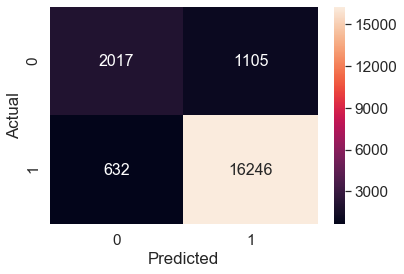

In [21]:
array=confusion_matrix(y_test, pred )
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
Lambdas = [10**-4,10**-2,10**0,10**2,10**4]

In [ ]:
cv_scores = []

for k in Lambdas:
    clf1 = LogisticRegression(C=1/k, penalty='l1')
     # fitting the model on crossvalidation train
    clf1.fit(X_train, y_train)
    # predict the response on the crossvalidation train
    pred = clf1.predict(X_cv)
     # evaluate CV accuracy
    f1_value = f1_score(y_cv, pred, average='weighted') * float(100)
    cv_scores.append(f1_value)

In [ ]:
MSE = [100 - x for x in cv_scores]

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(Lambdas, MSE)

for xy in zip(Lambdas, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Lambda Values')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each lambda value is : ", np.round(MSE,3))

In [ ]:
Sparsity_scores = []

for k in Lambdas:
    clf1 = LogisticRegression(C=1/k, penalty='l1')
     # fitting the model on crossvalidation train
    clf1.fit(X_train, y_train)
    w = clf1.coef_
    print(np.count_nonzero(w))
    Sparsity_scores.append(np.count_nonzero(w))

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(Lambdas, Sparsity_scores)

for xy in zip(Lambdas, Sparsity_scores):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Lambda Values')
plt.ylabel('Non-Zero Count')
plt.show()

## Feature Importance 

In [ ]:
clf = LogisticRegression(C=1, penalty='l1'); # Checking for multicollinearity through Pertubation test
clf.fit(X_train, y_train);
w = clf.coef_
w

In [ ]:
epsilon = np.random.normal(loc=0.0, scale=0.00000001)
X_train.data = X_train.data + epsilon

In [ ]:
clf1 = LogisticRegression(C=1, penalty='l1'); # Checking for multicollinearity through Pertubation test
clf1.fit(X_train, y_train);
w1 = clf1.coef_
w1

In [ ]:
w = w.tolist()
w1 = w1.tolist()

In [ ]:
percent_change=[-9999 if x == 0 else (((y - x) * 100)) for x, y in zip(w[0], w1[0])]

In [ ]:
all_features = count_vect.get_feature_names()
all_nd_features = np.array(all_features)

In [ ]:
feature_dict = dict(zip(all_nd_features, percent_change))
features_dic = {k:v for k,v in feature_dict.items() if v != -9999}
len(features_dic)

In [ ]:
features_dict = {k:v for k,v in features_dic.items() if v <0.4}
len(features_dict)

In [ ]:
top_100_features=sorted(features_dict, key=features_dict.get, reverse=True)[:100]

In [ ]:
from collections import Counter
from wordcloud import WordCloud

In [ ]:
word_could_dict=Counter(top_100_features)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()

## tf-idf Vectorization Technique

In [23]:
X_1 = X[:math.ceil(len(df)*0.8)]
y_1 = y[:math.ceil(len(df)*0.8)]
X_test = X[math.ceil(len(df)*0.8):]
y_test = y[math.ceil(len(df)*0.8):]

X_train = X_1[:math.ceil(len(df)*0.6)]
y_train = y_1[:math.ceil(len(df)*0.6)]
X_cv = X_1[math.ceil(len(df)*0.6):]
y_cv = y_1[math.ceil(len(df)*0.6):]

print(X_train.shape, y_train.shape, X_cv.shape, X_test.shape)

(60000,) (60000,) (20000,) (20000,)


In [24]:
tf_idf_vect = TfidfVectorizer(dtype='float')
X_train = tf_idf_vect.fit_transform(X_train)

In [25]:
X_test=tf_idf_vect.transform(X_test)
X_cv = tf_idf_vect.transform(X_cv)

In [26]:
X_train

<60000x46146 sparse matrix of type '<class 'numpy.float64'>'
	with 1930676 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False).fit_transform(X_train)
print(standardized_data.shape)

(60000, 46146)


## Calculate 'Lambda' using GridSearchCV

In [28]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_weighted', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9108521324962603


## Calculate 'Lambda' using RandomizedSearchCV 

In [29]:
tuned_parameters = {'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}
model1 = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_weighted', cv=5, n_iter=3)
model1.fit(X_train, y_train)

print(model1.best_estimator_)
print(model1.score(X_test, y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9108521324962603


## LogisticRegression using L2 Regularization

In [30]:
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
f1_value = f1_score(y_test, pred,average='weighted') * float(100)
print('\nThe F1-Score for L2 Regularization is %f%%' % (f1_value))


The F1-Score for L2 Regularization is 91.085213%


In [31]:
clf1 = LogisticRegression(C=1, penalty='l1')
clf1.fit(X_train, y_train)
pred = clf1.predict(X_test)
f1_value = f1_score(y_test, pred,average='weighted') * float(100)
print('\nThe F1-Score for L2 Regularization is %f%%' % (f1_value))


The F1-Score for L2 Regularization is 91.327572%


## Confusion matrix 

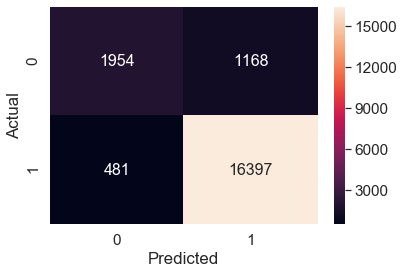

In [32]:
array=confusion_matrix(y_test, pred )
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## lambda vs error

In [33]:
cv_scores = []

for k in Lambdas:
    clf1 = LogisticRegression(C=1/k, penalty='l2')
     # fitting the model on crossvalidation train
    clf1.fit(X_train, y_train)
    # predict the response on the crossvalidation train
    
    pred = clf1.predict(X_cv)
     # evaluate CV accuracy
    f1_value = f1_score(y_cv, pred, average='weighted') * float(100)
    cv_scores.append(f1_value)

In [34]:
MSE = [100 - x for x in cv_scores]

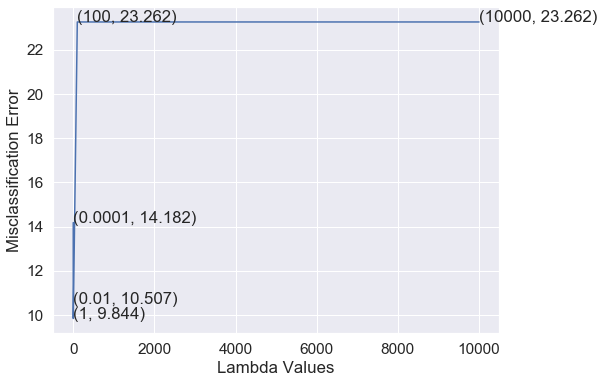

In [35]:
plt.figure(figsize=(8,6))
plt.plot(Lambdas, MSE)

for xy in zip(Lambdas, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Lambda Values')
plt.ylabel('Misclassification Error')
plt.show()

In [36]:
Sparsity_scores = []

   
for k in Lambdas:
    clf1 = LogisticRegression(C=1/k, penalty='l2')
     # fitting the model on crossvalidation train
    clf1.fit(X_train, y_train)
    w = clf1.coef_
    print(np.count_nonzero(w))
    Sparsity_scores.append(np.count_nonzero(w))

46146
46146
46146
46146
46146


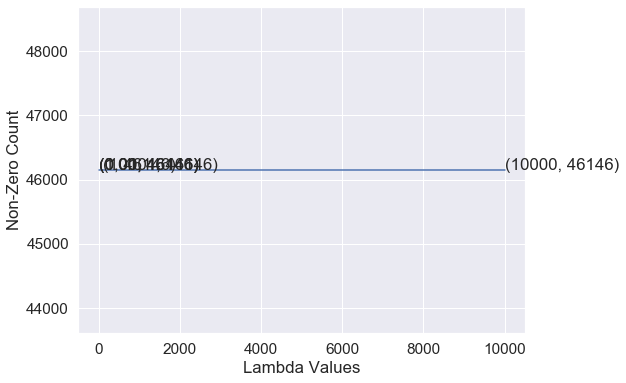

In [37]:
plt.figure(figsize=(8,6))
plt.plot(Lambdas, Sparsity_scores)

for xy in zip(Lambdas, Sparsity_scores):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Lambda Values')
plt.ylabel('Non-Zero Count')
plt.show()

## Feature Importance

In [ ]:
clf = LogisticRegression(C=100, penalty='l1'); # Checking for multicollinearity through Pertubation test
clf.fit(X_train, y_train);
w = clf.coef_
w

In [ ]:
epsilon = np.random.normal(loc=0.0, scale=0.00000001)
X_train.data = X_train.data + epsilon

In [ ]:
clf1 = LogisticRegression(C=100, penalty='l1'); # Checking for multicollinearity through Pertubation test
clf1.fit(X_train, y_train);
w1 = clf1.coef_
w1

In [ ]:
w = w.tolist()
w1 = w1.tolist()

In [ ]:
percent_change=[-9999 if x == 0 else (((y - x) * 100)) for x, y in zip(w[0], w1[0])]

In [ ]:
all_features = tf_idf_vect.get_feature_names()
all_nd_features = np.array(all_features)

In [ ]:
feature_dict=dict(zip(all_nd_features,percent_change))

In [ ]:
features_dic = {k:v for k,v in feature_dict.items() if v != -9999}
len(features_dic)

In [ ]:
features_dict = {k:v for k,v in features_dic.items() if v <0.4}
len(features_dict)

In [ ]:
top_100_features=sorted(features_dict, key=features_dict.get, reverse=True)[:100]

In [ ]:
word_could_dict=Counter(top_100_features)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()

## Word2Vec 

In [9]:
from gensim.models import Word2Vec
import math

In [10]:
X_1 = X[:math.ceil(len(df)*0.8)]
y_1 = y[:math.ceil(len(df)*0.8)]
X_test = X[math.ceil(len(df)*0.8):]
y_test = y[math.ceil(len(df)*0.8):]

X_train = X_1[:math.ceil(len(df)*0.6)]
y_train = y_1[:math.ceil(len(df)*0.6)]
X_cv = X_1[math.ceil(len(df)*0.6):]
y_cv = y_1[math.ceil(len(df)*0.6):]

print(X_train.shape, y_train.shape, X_cv.shape, X_test.shape)

(60000,) (60000,) (20000,) (20000,)


In [11]:
list_of_sentence = []
for sentence in X_train:
    words = []
    sentence = sentence.decode('utf-8')
    sentence = cleanhtml(sentence)
    for word in sentence.split():
        word = cleanpunc(word)
        if(word.isalpha()):    
            words.append(word)
        else:
            continue 
    list_of_sentence.append(words)

In [12]:
print(list_of_sentence[:5])

[['bought', 'sever', 'vital', 'can', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'labrador', 'finicki', 'appreci', 'product', 'better'], ['product', 'arriv', 'label', 'jumbo', 'salt', 'peanutsth', 'peanut', 'actual', 'small', 'size', 'unsalt', 'sure', 'error', 'vendor', 'intend', 'repres', 'product', 'jumbo'], ['confect', 'around', 'centuri', 'light', 'pillowi', 'citrus', 'gelatin', 'nut', 'case', 'filbert', 'cut', 'tini', 'squar', 'liber', 'coat', 'powder', 'sugar', 'tini', 'mouth', 'heaven', 'chewi', 'flavor', 'high', 'recommend', 'yummi', 'treat', 'familiar', 'stori', 'lewi', 'lion', 'witch', 'wardrob', 'treat', 'seduc', 'edmund', 'sell', 'brother', 'sister', 'witch'], ['look', 'secret', 'ingredi', 'robitussin', 'believ', 'found', 'got', 'addit', 'root', 'beer', 'extract', 'order', 'good', 'made', 'cherri', 'soda', 'flavor', 'medicin'], ['great', 'taffi', 'great', 'price', 'wide', 'assort', 'yummi', '

In [13]:
len(list_of_sentence)

60000

In [14]:
w2v_model = gensim.models.Word2Vec(list_of_sentence, min_count = 5, size = 50, workers = 4)

In [15]:
print(w2v_model.wv)

In [16]:
w2v_vocab = list(w2v_model.wv.vocab)

In [17]:
print(w2v_vocab[:50])

['bought', 'sever', 'vital', 'can', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'labrador', 'finicki', 'appreci', 'arriv', 'label', 'jumbo', 'salt', 'peanut', 'actual', 'small', 'size', 'unsalt', 'sure', 'error', 'vendor', 'intend', 'repres', 'confect', 'around', 'centuri', 'light', 'citrus', 'gelatin', 'nut', 'case', 'cut', 'tini', 'squar', 'liber', 'coat', 'powder', 'sugar', 'mouth']


In [18]:
w2v_model.wv.most_similar('vital')

[('dogswel', 0.875361442565918),
 ('venison', 0.8134377002716064),
 ('liver', 0.7846696376800537),
 ('senior', 0.7810736298561096),
 ('chondroitin', 0.7810376882553101),
 ('grainfre', 0.7765879034996033),
 ('duck', 0.7710288763046265),
 ('merrick', 0.7697089910507202),
 ('rabbit', 0.7652503252029419),
 ('fdas', 0.7578303813934326)]

## Average Word2Vec 

In [19]:
from tqdm import tqdm

corpus_embedding = []
for sentence in tqdm(X_train):
#     print(sentence)
#     break
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    count_words = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            sentence_embedding += embedding
            count_words += 1
    if count_words != 0:
        sentence_embedding /= count_words
    corpus_embedding.append(sentence_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [04:42<00:00, 212.68it/s]


In [20]:
print(len(corpus_embedding))
print(len(corpus_embedding[0]))
corpus_embedding[:2]

60000
50


[array([-0.12485765, -0.20946853, -0.50281412, -0.27152861, -0.38271464,
        -1.15413848, -0.50183553,  0.46895292,  0.91683702,  0.547806  ,
        -0.05594523,  0.13048746,  0.56931209, -0.0403921 ,  0.29932111,
         0.06919575, -0.25155262,  0.14542082, -0.03216714,  0.03741129,
        -0.45387328,  0.69051582, -0.42724016, -0.10526204, -0.19309794,
         0.12454579,  0.13154647, -0.02076082,  0.13861944, -0.35758834,
         0.07213515, -0.79691985, -0.83368152,  0.91389558,  0.21184588,
        -0.34482543, -0.25646842, -0.07389233,  0.57514942, -0.07723002,
        -0.60265147, -0.26925374, -0.79526992,  0.15289285, -0.55785317,
        -0.02749907,  1.10840098,  0.02418711, -0.18202871,  0.43179559]),
 array([ 0.29611859, -0.81455073, -0.18951612, -0.22182442, -1.00204599,
        -0.31391356,  0.3963934 ,  0.41301988,  0.48171531,  0.24230132,
         0.47007052,  0.22936792,  0.63439866,  0.46944355, -0.02297508,
         0.63003729, -0.33088012, -0.43310354,  0

In [21]:
corpus_embedding_test = []
for sentence in tqdm(X_test.values):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    count_words = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            sentence_embedding += embedding
            count_words += 1
    if count_words != 0:
        sentence_embedding /= count_words
    corpus_embedding_test.append(sentence_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:20<00:00, 249.59it/s]


In [22]:
print(len(corpus_embedding_test))
print(len(corpus_embedding_test[0]))
corpus_embedding_test[:2]

20000
50


[array([ 0.52978918, -1.08995356, -0.93258934,  0.09153159,  0.56114528,
        -0.09933524,  0.2948155 ,  0.04054058,  0.0827764 , -0.48326617,
         0.14506811, -0.69776554, -0.66835953, -1.09618263,  0.36339737,
        -0.23981325, -0.63903351, -0.17812204,  0.21323988, -0.65693027,
        -0.44107895, -0.06255757, -0.08687077,  0.06972815, -0.26888978,
        -0.16073475,  0.24542041, -0.22955214, -0.31257711, -0.27003852,
        -0.10664568, -0.23876004, -0.21317973, -0.0701289 , -0.51838882,
        -0.28471235, -0.40671616,  0.37215072,  0.05802686, -0.04253519,
        -0.6209703 , -0.16940574, -0.70865526,  0.32837739, -0.37805076,
        -0.01186712,  1.02365741,  0.14308681,  0.53645391, -0.04088891]),
 array([-0.18737875, -0.80850782, -0.8868481 ,  0.15551187,  0.06289833,
         0.04398868,  0.12021161, -0.39286492,  0.30453932,  0.11318382,
         0.13318257, -0.03680606,  0.26437065, -0.63460314,  0.22150915,
        -0.04560397, -0.7437811 ,  0.03381002,  0

In [23]:
corpus_embedding_cv = []
for sentence in tqdm(X_cv.values):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    count_words = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            sentence_embedding += embedding
            count_words += 1
    if count_words != 0:
        sentence_embedding /= count_words
    corpus_embedding_cv.append(sentence_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:21<00:00, 245.57it/s]


In [24]:
print(len(corpus_embedding_cv))
print(len(corpus_embedding_cv[0]))
corpus_embedding_cv[:2]

20000
50


[array([ 0.65579555, -0.11944762, -1.36235781, -0.82912964, -0.60921084,
        -0.33329632,  0.45101467,  0.54716772,  0.53843194,  0.23816655,
        -0.11195545,  0.65083386, -0.23019189, -0.65756898, -0.21678019,
        -1.06668749,  0.73643121, -0.98655402, -0.68886056, -0.11996086,
        -0.97912521, -0.47365586,  0.04731482,  0.74692253,  0.34535329,
        -0.45372822,  0.45532876,  0.22219964,  0.38055029, -0.20535104,
         0.03094273, -0.35049272, -0.21366218, -1.014781  ,  0.56110164,
        -0.93397924, -0.40770859, -0.15950471,  0.4327053 ,  0.75002095,
        -1.10739707,  0.43581824,  0.3597423 , -0.94217211, -0.18275373,
        -0.75183912,  0.74277287, -1.06649303,  1.24138528,  0.39524694]),
 array([-0.35897096,  0.12793716, -0.83918417, -0.76022925,  0.25938764,
        -0.32381201,  0.17117344,  0.67800735, -0.09597044,  0.00594894,
         0.05303533,  0.37418468, -0.71223739, -0.98504025, -0.27402102,
         0.09988434, -0.28289767, -0.26561079,  0

In [25]:
X_train = corpus_embedding
X_test = corpus_embedding_test
X_CV = corpus_embedding_cv

## Calculate 'Lambda' using GridSearchCV 

In [27]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_weighted', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8832562057342288


## Calculate 'Lambda' using RandomizedSearchCV 

In [28]:
tuned_parameters = {'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}
model1 = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_weighted', cv=5, n_iter=3)
model1.fit(X_train, y_train)

print(model1.best_estimator_)
print(model1.score(X_test, y_test))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8832562057342288


## LogisticRegression using L2 Regularization 

In [29]:
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [30]:
f1_value = f1_score(y_test, pred,average='weighted') * float(100)
print('\nThe F1-Score for L2 Regularization is %f%%' % (f1_value))


The F1-Score for L2 Regularization is 88.325646%


## LogisticRegression using L1 Regularization 

In [31]:
clf1 = LogisticRegression(C=1, penalty='l1')
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)

In [32]:
f1_value = f1_score(y_test, pred1, average='weighted') * float(100)
print('\nThe F1-Score for L1 Regularization is %f%%' % (f1_value))


The F1-Score for L1 Regularization is 88.304017%


## Confusion matrix 

In [33]:
array = confusion_matrix(y_test, pred)

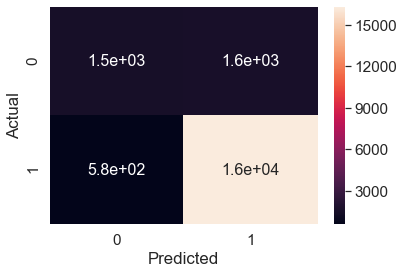

In [34]:
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
Lambdas = [10**-4,10**-2,10**0,10**2,10**4]

In [36]:
cv_scores = []
   
for k in Lambdas:
    clf1 = LogisticRegression(C=1/k, penalty='l1')
     # fitting the model on crossvalidation train
    clf1.fit(X_train, y_train)
    # predict the response on the crossvalidation train
    
    pred = clf1.predict(X_CV)
     # evaluate CV accuracy
    f1_value = f1_score(y_cv, pred, average='weighted') * float(100)
    cv_scores.append(f1_value)

In [37]:
MSE = [100 - x for x in cv_scores]
MSE

[12.631447017926973,
 12.631447017926973,
 12.631784762630332,
 13.263687344474405,
 23.26206705428463]

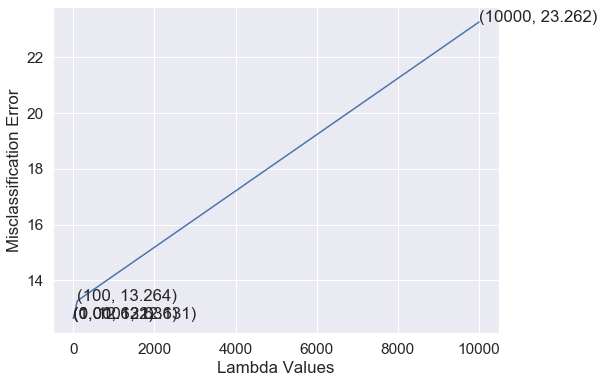

In [38]:
plt.figure(figsize=(8,6))
plt.plot(Lambdas, MSE)

for xy in zip(Lambdas, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Lambda Values')
plt.ylabel('Misclassification Error')
plt.show()

In [40]:
Sparsity_Scores = []

for k in Lambdas:
    clf1 = LogisticRegression(C = 1/k, penalty = 'l1')
    clf1.fit(X_train, y_train)
    w = clf1.coef_
    print(np.count_nonzero(w))
    Sparsity_Scores.append(np.count_nonzero(w))

50
50
50
33
0


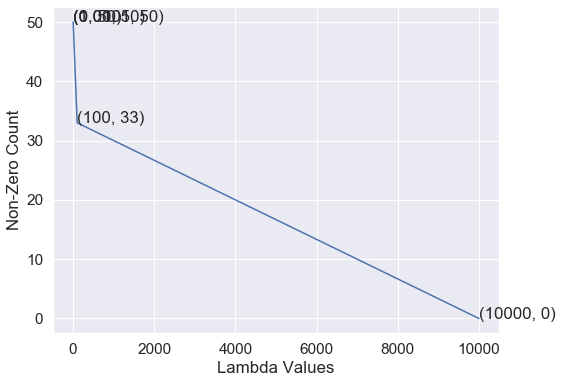

In [42]:
plt.figure(figsize=(8,6))
plt.plot(Lambdas, Sparsity_Scores)

for xy in zip(Lambdas, Sparsity_Scores):
    plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')

plt.xlabel('Lambda Values')
plt.ylabel('Non-Zero Count')
plt.show()

## Average Word2Vec with tf_idf 

In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer()

tf_idf_matrix = model.fit_transform(X_train.values)
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [291]:
tfidf_embedding = []
for sentence in tqdm(X_train):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    weight_sum = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            tf_idf = dictionary[word] * sentence.count(word)
            sentence_embedding += (embedding * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sentence_embedding /= weight_sum
    tfidf_embedding.append(sentence_embedding)

100%|██████████| 60000/60000 [01:49<00:00, 547.09it/s]


In [292]:
tfidf_embedding[:1]

[array([ 0.49783587,  0.12231475, -0.12560517,  0.36890145,  0.19909141,
        -0.40510795, -0.28291334, -0.18040224,  0.23266884, -0.47090244,
         0.4803518 ,  0.22619316, -0.29317434,  0.02209257,  0.08068267,
        -0.29437718,  0.05540543,  0.17686955, -0.13521102, -0.12169355,
        -0.36893002, -0.56393425,  0.63908845, -0.07714613, -0.30687754,
         0.08690704, -0.29011346,  0.18253315, -0.88322875, -0.49945644,
        -0.32704492, -1.01306613,  0.06844313,  0.36794265, -0.20144012,
        -0.54565518, -0.28555346,  0.37439441,  0.83892591, -0.52325959,
         0.60660107, -0.03196828,  0.01574486, -0.5170446 , -0.53218022,
         0.37927397,  1.00704537, -0.5859586 ,  0.8077709 ,  0.03277443])]

In [293]:
tfidf_embedding_test = []
for sentence in tqdm(X_test):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    weight_sum = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            tf_idf = dictionary[word] * sentence.count(word)
            sentence_embedding += (embedding * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sentence_embedding /= weight_sum
    tfidf_embedding_test.append(sentence_embedding)

100%|██████████| 20000/20000 [00:35<00:00, 560.64it/s]


In [294]:
tfidf_embedding_test[:1]

[array([ 0.25171986,  0.23622187, -0.76169539,  0.68036085, -0.56270203,
        -0.207025  ,  0.99290651,  0.51128945, -0.49077345,  0.25647373,
        -0.42178422,  0.50763507,  0.57167984,  0.27064421, -0.01302953,
         0.15699311, -0.83758979, -0.00754108,  0.62960362, -0.47149934,
         0.07118557,  0.37806763,  0.48500558,  0.11890137, -0.56241435,
         0.38334651, -0.66468657, -0.2712106 , -0.32648738, -0.1279903 ,
        -0.07356892, -0.10431867, -0.01893302,  0.64409424, -0.27912134,
        -0.64605565,  0.39366062,  0.22463009, -0.43928205,  0.13364965,
         0.09099705, -0.50904631, -0.13208658, -0.49465468,  0.24093296,
        -0.13767485,  0.68397224,  0.13954011,  1.21340579, -0.01779093])]

In [295]:
tfidf_embedding_cv = []
for sentence in tqdm(X_cv):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    weight_sum = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            tf_idf = dictionary[word] * sentence.count(word)
            sentence_embedding += (embedding * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sentence_embedding /= weight_sum
    tfidf_embedding_cv.append(sentence_embedding)

100%|██████████| 20000/20000 [00:38<00:00, 526.00it/s]


In [296]:
tfidf_embedding_cv[:1]

[array([-0.70055491,  0.23255103,  0.20840896,  0.22608537, -0.46473457,
         0.46686146, -0.09497256, -0.2967896 , -0.37357113,  0.55676659,
        -0.48692695,  0.94216948, -1.79095767, -0.53577616,  0.66806717,
         0.58600075,  0.4351291 ,  0.33036784,  0.95311044, -0.26563092,
        -0.35177702,  0.8849274 , -0.42681981, -0.70409937, -1.95830514,
        -0.46036565,  0.0285272 ,  0.62639581,  0.52375936, -0.27434186,
        -0.93943526,  0.33869912, -1.86096169,  0.3231114 ,  0.55746352,
         0.75543446,  0.95196995,  1.46532887,  0.19842415, -0.09156518,
         0.68453445, -1.08542465,  0.13417033, -0.12654752,  0.62075355,
         0.32465316,  1.17428756, -0.91031479,  1.5900295 ,  0.42382099])]

In [ ]:
X_train = tfidf_embedding
X_test = tfidf_embedding_test
X_CV = tfidf_embedding_cv

## Calculate 'Lambda' using GridSearchCV

In [ ]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_weighted', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

## Calculate 'Lambda' using RandomizedSearchCV 

In [ ]:
tuned_parameters = {'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}
model1 = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_weighted', cv=5, n_iter=3)
model1.fit(X_train, y_train)

print(model1.best_estimator_)
print(model1.score(X_test, y_test))

## LogisticRegression using L2 Regularization

In [ ]:
clf = LogisticRegression(C=100, penalty='l2')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
f1_value = f1_score(y_test, pred,average='weighted') * float(100)
print('\nThe F1-Score for L2 Regularization is %f%%' % (f1_value))

## LogisticRegression using L1 Regularization 

In [ ]:
clf1 = LogisticRegression(C=100, penalty='l1')
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)
f1_value = f1_score(y_test, pred1,average='weighted') * float(100)
print('\nThe F1-Score for L1 Regularization is %f%%' % (f1_value))

## Confusion matrix 

In [ ]:
array=confusion_matrix(y_test, pred1 )
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## lambda vs error and sparsity 

In [ ]:
cv_scores = []
Sparsity_scores=[]
   
for k in Lambdas:
    clf1 = LogisticRegression(C=1/k, penalty='l1')
     # fitting the model on crossvalidation train
    clf1.fit(X_train, y_train)
    # predict the response on the crossvalidation train
    
    pred = clf1.predict(X_CV)
     # evaluate CV accuracy
    f1_value = f1_score(y_CV, pred, average='weighted') * float(100)
    cv_scores.append(f1_value)
    w = clf1.coef_
    print(np.count_nonzero(w))
    Sparsity_scores.append(np.count_nonzero(w))

In [ ]:
MSE = [100 - x for x in cv_scores]

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(Lambdas, MSE)

for xy in zip(Lambdas, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Lambda Values')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(Lambdas,  Sparsity_scores)

for xy in zip(Lambdas, ( Sparsity_scores)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Lambda Values')
plt.ylabel('No of non-sparsity values ')
plt.show()